In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
%matplotlib inline

print('Starting Imports')
from scipy.special import gamma
import sys
from time import time
import resource
import pandas as pd
import os
import itertools
filename = 'ValsDir/'

Nu = [-12,-6.154902]
Eta = [-12,-8.154902]
Lambda = [-12,-6.154902]

Starting Imports


In [3]:
class MechAn:
    def __init__(self,home_dir,EtaLim, NuLim, LambdaLim):
        self.root = home_dir
        self.Eta= EtaLim
        self.Nu = NuLim
        self.Lambda = LambdaLim
        self.FileList = []
        self.percentiles=[.75,.9,.95,.99]
        self.teststatistics={}
        self.stats={}
        self.AreaQuantiles = [.01,.05,.1,.125,.25,.5,.75,.875,.9,.95,.99]
        
    def SetParams(self,**kwargs):
        ParamDict={}
        for key,value in kwargs.items():
            ParamDict[key]=value
        self.ParamDict = ParamDict
        
    def FindFiles(self, ExcludeDirs):
        FileList = []
        flag1 = False
        for root, dirs, files in os.walk(self.root):
            if not np.any([self.root+item == root for item in ExcludeDirs]):
                for file in files:
                    if os.stat(os.path.join(root,file)).st_size>100:
                        try: 
                            tempdat = pd.read_pickle(os.path.join(root,file))
                        except:
                            continue

                        if False not in [self.ParamDict[key] in list(tempdat[key]) for key in self.ParamDict if key != 'TrueE']:
                            if tempdat[tempdat['TrueE'].map(tuple).isin([tuple(self.ParamDict['TrueE'])])].shape[0]>0:
                                FileList.append(os.path.join(root,file))
#                     print(len(FileList))
        print('Found '+str(len(FileList))+' files fitting those parameters')
        self.FileList = FileList
        return (len(FileList))
    
    def GetBestKTLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['KTE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict

    
    def GetBestTLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['TE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict

    def GetBestParam(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = list(FullDF['MinKTLoc'])
        return returnDict
    
    def GetBestKLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['KE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict
                
    
        
        
    def GetTestStatistic(self,newPercentiles = False,Verbose=False):
        if newPercentiles:
            self.percentiles = newPercentiles
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]
                
        print('Full DF Shape after cuts:',FullDF.shape)
        FullDF = FullDF[FullDF['MinKT'] >0]
        print('Shape after Removing Nans',FullDF.shape)
#         samp_list = list(set(list(FullDF['Samps'])))
#         percent_in = [.75,.90,.95,.99,.995]
        # Chi_lines = [1.33, 2.71,3.84,6.64]
        KTCut=[]
        TCut=[]


        KTLS = FullDF['KTL']
        TLS = FullDF['TL']
        KLS = FullDF['KL']
        DefKT = FullDF['DefKT']
        minKT = FullDF['MinKT']

        KTLS=-1*KTLS
        TLS=-1*TLS
        KLS = -1*KLS
        KTLS = sorted(KTLS)
        TLS = sorted(TLS)
        KLS = sorted(KLS)
        
        if Verbose==1:
            return FullDF
        elif Verbose ==2:
            return KTLS,TLS,KLS
        elif Verbose ==3:
            return DefKT,minKT,KTLS,TLS,KLS
        
        for j2 in self.percentiles:
    #         print(int(j*len(KTLS)))
#             print(len(KTLS),int(j2*len(KTLS)))
            KTCut.append(KTLS[int(j2*len(KTLS))])
            TCut.append(TLS[int(j2*len(TLS))])
        self.teststatistics['TL'] = TCut
        self.teststatistics['KTL']= KTCut
        if Verbose == 4:
            return TCut, KTCut

    def GetVar(self):
        
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnt = FullDF['VarT']
        returnkt = FullDF['VarKT']
        
        minT = FullDF['MinT']
        minKT = FullDF['MinKT']
        
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnt, returnkt, minT, minKT
        
        
    def GetAreas(self,returnAreas=False,PType=False, returnStats=False, returnHist=False):
        TCut = self.teststatistics['TL']
        KTCut = self.teststatistics['KTL']
        indes=[]
        files=0
        if 'KTAreas' not in locals():
            KTAreas={}
            TAreas={}
        for file in self.FileList:
                if os.path.exists(file):
                    tempdf = pd.read_pickle(file)
                    files+=1
                else:
                    continue


                for key in self.ParamDict:
                    if key == 'TrueE':
                        tempdf = tempdf[tempdf[key].map(tuple).isin([tuple(self.ParamDict[key])])]
                    else:
                        tempdf = tempdf[tempdf[key]==self.ParamDict[key]]
                    tempdf= tempdf[tempdf['MinKT'] >0]

                for l in range(0,tempdf.shape[0]):
                    for j in range(0,len(self.percentiles)):
                        if str(self.percentiles[j]) not in KTAreas.keys():


                            inde=np.argmin([np.abs(item -1*KTCut[j]) for item in tempdf['KTX'].iloc[l]])

                            KTAreas[str(self.percentiles[j])] = [tempdf['KTY'].iloc[l][inde]]

                            indes.append(inde)
                            inde=np.argmin([ np.abs(item -1*TCut[j]) for item in tempdf['TX'].iloc[l]])
                            TAreas[str(self.percentiles[j])] = [tempdf['TY'].iloc[l][inde]]
                        else:

                            inde=np.argmin([np.abs(item -1*KTCut[j]) for item in tempdf['KTX'].iloc[l]])
                            KTAreas[str(self.percentiles[j])].append(tempdf['KTY'].iloc[l][inde])

                            indes.append(inde)
                            inde=np.argmin([ np.abs(item -1*TCut[j]) for item in tempdf['TX'].iloc[l]])
                            TAreas[str(self.percentiles[j])].append(tempdf['TY'].iloc[l][inde])
        self.Quants={} 
        for j in self.percentiles:
            self.Quants['T,'+str(j)]=np.quantile(TAreas[str(j)],self.AreaQuantiles)
            self.Quants['KT,'+str(j)] =  np.quantile(KTAreas[str(j)],self.AreaQuantiles)
            
        if returnAreas:
            bpax = returnAreas.boxplot([np.asarray(KTAreas[str(j)])/np.asarray(TAreas[str(j)]) for j in self.percentiles],positions = [i for i in range(0,len(self.percentiles))],showfliers=False)
            
            if PType=='grid':
                returnAreas.set_title(str(self.ParamDict['TrueE']))
                returnAreas.set_xticklabels([str(round(item*100,0)) for item in self.percentiles])
                returnAreas.grid(which='major', linestyle=':', linewidth='0.5', color='red')
            elif PType=='comp':
                returnAreas.set_title('Res: '+ str(self.ParamDict['Res']) +'  Samples: '+str(self.ParamDict['Samps']))
                returnAreas.set_xticklabels([str(round(item*100,0)) for item in self.percentiles])
                returnAreas.grid(which='major', linestyle=':', linewidth='0.5', color='red')
            return bpax
        
        if returnStats:
            return(self.Quants)
        if returnHist:
            return([KTAreas[str(self.percentiles[0])][i]/TAreas[str(self.percentiles[0])][i] for i in range(0,len(KTAreas[str(self.percentiles[0])]))])
            
        


In [6]:
# filename = 'ValsAdaptive/'

edges = [6,12,18]
a = list(itertools.product(edges, edges, edges))
a = [12,12,12]
samps=[1000,25000]
res = [1,1000]
config = list(itertools.product(samps,res))
Params={}

KTLE={}

for i in range(0,len(config)):
    print(i)

    if config[i][1]==1:
        EDirs=['Run100NoAdapt','Run1000NoAdapt','Run1NoAdapt','Run10NoAdapt','Run10high','Run1000Adapt']
        a = [12,12,12]
        print(10)

    elif config[i][1] == 1000:
        EDirs=['Run100NoAdapt','Run1000NoAdapt','Run1NoAdapt','Run10NoAdapt','Run10high','Run1Adapt']
#         a = [12,36,36]
        a = [12,12,12]
        print(1000)
    
    TestMechAn = MechAn(filename,Nu,Eta,Lambda)
    TestMechAn.SetParams(Res = config[i][1], Samps = config[i][0], TrueE=a)
    TestMechAn.FindFiles(ExcludeDirs=EDirs)
    print(config[i])
    Param = TestMechAn.GetBestParam()
    KT,T,K =TestMechAn.GetTestStatistic(Verbose=2)



    Params[i]=Param
    KTLE[i]=KT

0
10
Found 377 files fitting those parameters
(1000, 1)
Full DF Shape after cuts: (377, 18)
Shape after Removing Nans (377, 18)
1
1000
Found 631 files fitting those parameters
(1000, 1000)
Full DF Shape after cuts: (631, 18)
Shape after Removing Nans (631, 18)
2
10
Found 358 files fitting those parameters
(25000, 1)
Full DF Shape after cuts: (358, 18)
Shape after Removing Nans (358, 18)
3
1000
Found 620 files fitting those parameters
(25000, 1000)
Full DF Shape after cuts: (620, 18)
Shape after Removing Nans (620, 18)


(1000, 1)
(1000, 1000)


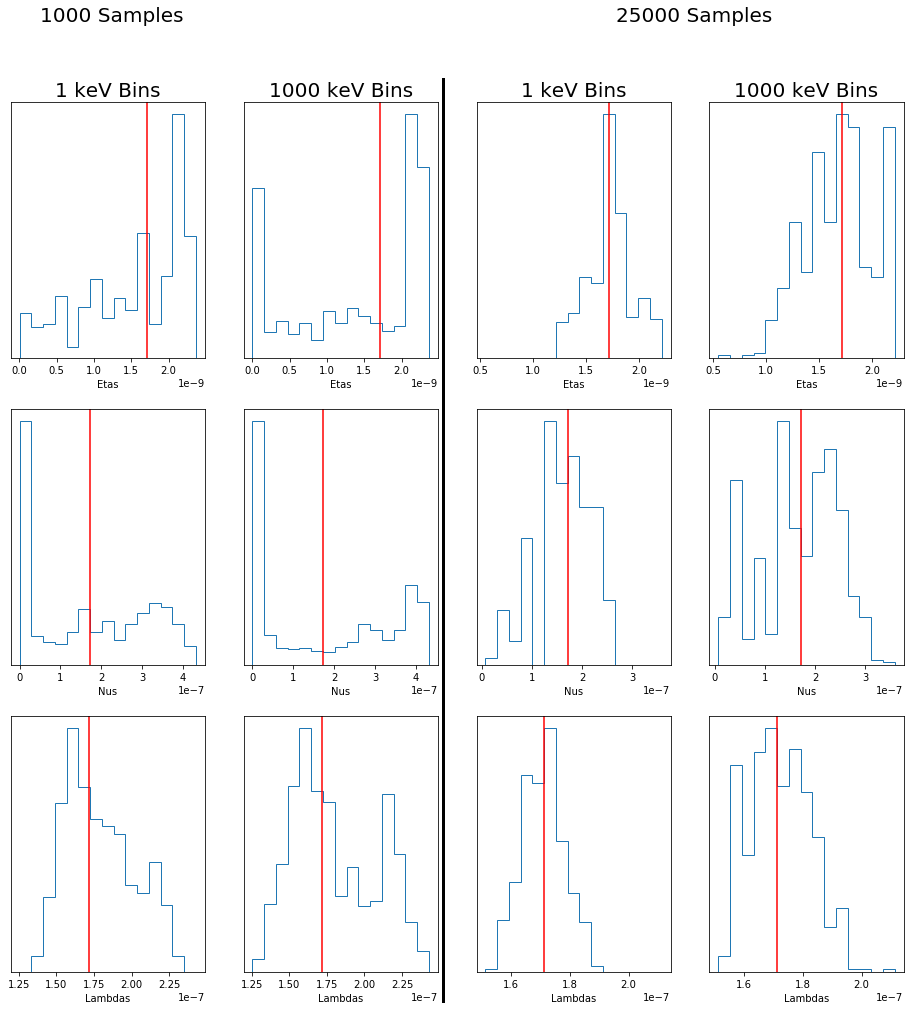

In [11]:
fig = plt.figure(figsize = (16,16))
fig.tight_layout()
Nulim = [-12,-6.154902]
Etalim = [-12,-8.154902]
Lambdalim = [-12,-6.154902]
Nu= np.linspace(10**Nulim[0],10**Nulim[1],50)
Eta=np.linspace(10**Etalim[0],10**Etalim[1],50)
Lambda=np.linspace(10**Lambdalim[0],10**Lambdalim[1],50)

# stats=[.6827,.9545,.9973]
for i in range(0,2):
    print(config[i])
    


    Vals = Params[2*i]
    Etas=[item[0] for item in Vals]
    Nus=[item[1] for item in Vals]
    Lambdas=[item[2] for item in Vals]
    
    Vals = Params[2*i+1]
    Etas2=[item[0] for item in Vals]
    Nus2=[item[1] for item in Vals]
    Lambdas2=[item[2] for item in Vals]
    
    Emin = np.min([min(Etas),min(Etas2)])
    Emax = np.max([max(Etas),max(Etas2)])
    
    Nmin = min([min(Nus),min(Nus2)])
    Nmax = max([max(Nus),max(Nus2)])
    
    Lmin = min([min(Lambdas),min(Lambdas2)])
    Lmax = max([max(Lambdas),max(Lambdas2)])

    

    ax1 = plt.subplot(3,len(config),2*i+1)
    ax1.hist(Etas,histtype='step',bins=15,label='Default-Min',range=(Emin,Emax))
    ax1.set_title('1 keV Bins',size=20)
    ax1.set_xlabel('Etas')
    ax1.axvline(Eta[12],color='r')
    
    ax2 = plt.subplot(3,len(config),2*i+(len(config)*(1)+1))
    ax2.hist(Nus,histtype='step',bins=15,label='Default-Min',range=(Nmin,Nmax))
    ax2.set_xlabel('Nus')
    ax2.axvline(Nu[12],color='r')

    
    ax3 = plt.subplot(3,len(config),2*i+len(config)*(2)+1)
    ax3.hist(Lambdas,histtype='step',bins=15,label='Default-Min',range=(Lmin,Lmax))
    ax3.set_xlabel('Lambdas')
    ax3.axvline(Lambda[12],color='r')
    
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax3.set_yticks([])

    
    ax1 = plt.subplot(3,len(config),2*i+2)
    ax1.hist(Etas2,histtype='step',bins=15,label='Default-Min',range=(Emin,Emax))
    ax1.set_title('1000 keV Bins',size=20)
    ax1.set_xlabel('Etas')
    ax1.axvline(Eta[12],color='r')
    
    ax2 = plt.subplot(3,len(config),2*i+(len(config)*(1)+2))
    ax2.hist(Nus2,histtype='step',bins=15,label='Default-Min',range=(Nmin,Nmax))
    ax2.set_xlabel('Nus')
    ax2.axvline(Nu[12],color='r')

    
    ax3 = plt.subplot(3,len(config),2*i+len(config)*(2)+2)
    ax3.hist(Lambdas2,histtype='step',bins=15,label='Default-Min',range=(Lmin,Lmax))
    ax3.set_xlabel('Lambdas')
    ax3.axvline(Lambda[12],color='r')
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax3.set_yticks([])



    

h1 = .635
h2 = .364
v1 = .38
v2 = .65
# plt.plot([.05, .9], [h1,h1], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
# plt.plot([.05, .9], [h2,h2], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)

plt.plot([.5,.5], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
# plt.plot([v2,v2], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
# plt.text(.39,.07,'Coverage Percentage', transform=plt.gcf().transFigure,clip_on=False,size=20)
# plt.text(.22,.95,'100 Samples',transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.15,.95,'1000 Samples',transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.65,.95,'25000 Samples',transform=plt.gcf().transFigure,clip_on=False,size=20)

# plt.show()
plt.savefig('AdaptConverge1000.png')

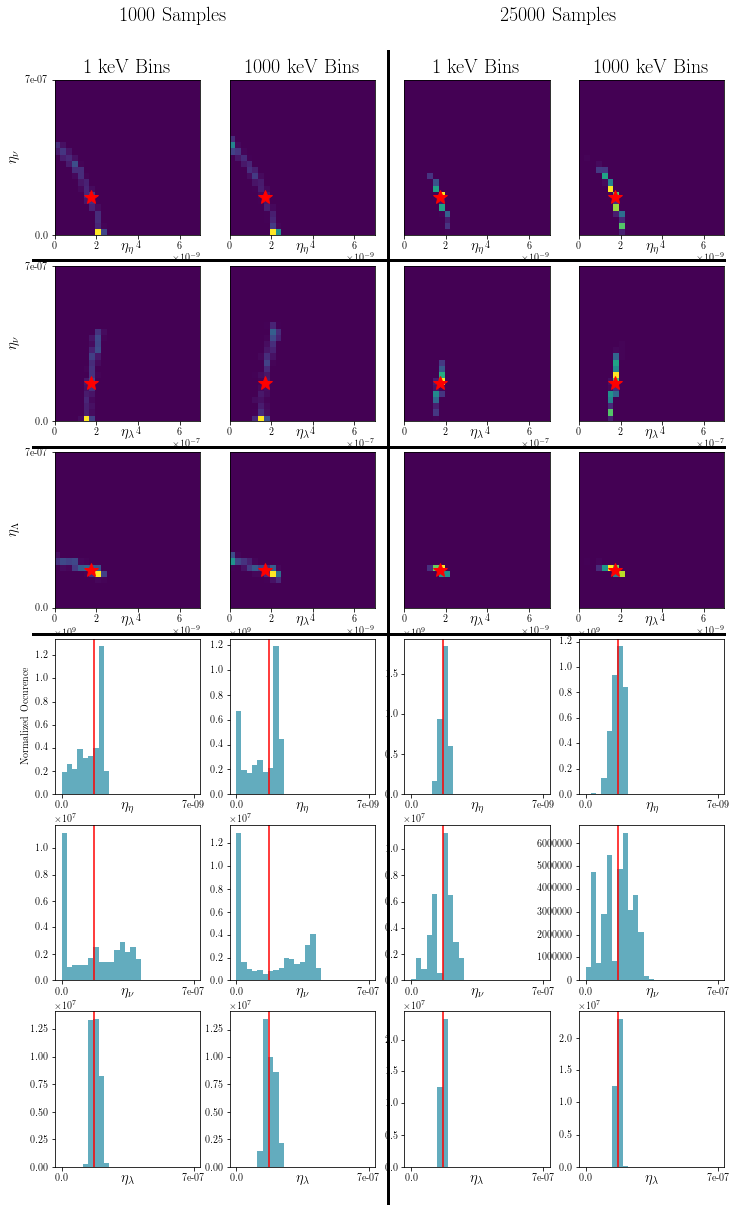

In [17]:
Nulim = [-12,-6.154902]
Etalim = [-12,-8.154902]
Lambdalim = [-12,-6.154902]

Nus= np.linspace(10**Nulim[0],10**Nulim[1],50)
Etas=np.linspace(10**Etalim[0],10**Etalim[1],50)
Lambdas=np.linspace(10**Lambdalim[0],10**Lambdalim[1],50)


from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# plt.rc['text.latex.unicode']=True

tsize = 15
samps=[100,1000]
res = [1,1000]
for j in range(0,1):
    f1 = plt.figure(figsize=(12,20))
    D={}
    filen='Temp1MeVConvergence.png'
    for i in range(0,len(config)):
        
        Vals = Params[i]
        E=[item[0] for item in Vals]
        N=[item[1] for item in Vals]
        L=[item[2] for item in Vals]
        D[i] = [np.sqrt((E[l]-10)**2+(N[l]-10)**2+(L[l]-10)**2) for l in range(0,len(L))]
        ax = f1.add_subplot(6,4,i+1)
        ax.hist2d(E,N,range=[[Etas[0],Etas[-1]],[Nus[0],Nus[-1]]],bins=25)
        ax.set_title(str(config[i][1])+ ' keV Bins',size=tsize+5)
        ax.plot(Etas[12],Nus[12],'r*',ms=15)
        ax.set_xlabel(r'$\eta_{\eta}$',size=tsize, labelpad=-10)
#         ax.set_xticks([0,24])
#         ax.set_xticklabels([round(Etas[0],10),round(Etas[-1],10)])

        ax2 = f1.add_subplot(6,4,i+5)
        ax2.hist2d(L,N,range=[[Lambdas[0],Lambdas[-1]],[Nus[0],Nus[-1]]],bins=25)
        ax2.plot(Lambdas[12],Nus[12],'r*',ms=15)
        ax2.set_xlabel(r'$\eta_{\lambda}$',size=tsize, labelpad=-10)
#         ax2.set_xticks([0,24])
#         ax2.set_xticklabels([round(Lambdas[0],10),round(Lambdas[-1],10)])

        ax3 = f1.add_subplot(6,4,i+9)
        ax3.hist2d(E,L,range=[[Etas[0],Etas[-1]],[Lambdas[0],Lambdas[-1]]],bins=25)
        ax3.plot(Etas[12],Lambdas[12],'r*',ms=15)
        ax3.set_xlabel(r'$\eta_{\lambda}$',size=tsize, labelpad=-10)
#         ax3.set_xticks([0,24])
#         ax3.set_xticklabels([round(Lambdas[0],10),round(Lambdas[-1],10)])

        ax4 = f1.add_subplot(6,4,i+13)
        ax4.hist(E,bins=25,range=(Etas[0],Etas[-1]),normed=True,color='#63ACBE')
        ax4.set_xlabel(r'$\eta_{\eta}$',size=tsize, labelpad=-10)
        ax4.axvline(Etas[12],color='r')
        ax4.set_xticks([Etas[0],Etas[-1]])
        ax4.set_xticklabels([round(Etas[0],10),round(Etas[-1],10)])        
        
        ax5 = f1.add_subplot(6,4,i+17)
        ax5.set_xlabel(r'$\eta_{\nu}$',size=tsize, labelpad=-10)

        ax5.hist(N,bins=25,range=(Nus[0],Nus[-1]),normed=True,color='#63ACBE')
        ax5.axvline(Nus[12],color='r')
        ax5.set_xticks([Nus[0],Nus[-1]])
        ax5.set_xticklabels([round(Nus[0],10),round(Nus[-1],10)])
        ax6 = f1.add_subplot(6,4,i+21)
        ax6.set_xlabel(r'$\eta_{\lambda}$',size=tsize, labelpad=-10)
        ax6.set_xticks([Lambdas[0],Lambdas[-1]])
        ax6.set_xticklabels([round(Lambdas[0],10),round(Lambdas[-1],10)])
        
        ax6.hist(L,bins=25,range=(Lambdas[0],Lambdas[-1]),normed=True,color='#63ACBE')
        ax6.axvline(Lambdas[12],color='r')


        if i == 0:
            ax.set_ylabel(r'$\eta_{\nu}$',size=tsize)
            ax2.set_ylabel(r'$\eta_{\nu}$',size=tsize)
            ax3.set_ylabel(r'$\eta_{\Lambda}$',size=tsize)
            ax4.set_ylabel('Normalized Occurence')
            ax.set_yticks([Nus[0],Nus[-1]])
            ax.set_yticklabels([round(Nus[0],10),round(Nus[-1],10)])
            ax2.set_yticks([Nus[0],Nus[-1]])
            ax2.set_yticklabels([round(Nus[0],10),round(Nus[-1],10)])
            ax3.set_yticks([Lambdas[0],Lambdas[-1]])
            ax3.set_yticklabels([round(Lambdas[0],10),round(Lambdas[-1],10)])

#             ax4.set_yticks([0,24])
            
        else:
            ax.set_yticks([])
            ax2.set_yticks([])
            ax3.set_yticks([])
#             ax4.set_yticks([])



    h1 = .755
    h2 = .625
    h3 = .495
    v1 = .38
    v2 = .65
    plt.plot([.1, .9], [h1,h1], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
    plt.plot([.1, .9], [h2,h2], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
    plt.plot([.1, .9], [h3,h3], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
    plt.plot([.51,.51], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
#     plt.plot([v2,v2], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)    
#     plt.text(.22,.95,'100 Samples',transform=plt.gcf().transFigure,clip_on=False,size=20)
    plt.text(.20,.92,'1000 Samples',transform=plt.gcf().transFigure,clip_on=False,size=20)
    plt.text(.64,.92,'25000 Samples',transform=plt.gcf().transFigure,clip_on=False,size=20)
#     plt.text(.05,h2+.01,r'$\eta_{\lambda}$', transform=plt.gcf().transFigure,clip_on=False,size=20)
#     plt.text(.05,h3+.01,r'$\eta_{\lambda}$', transform=plt.gcf().transFigure,clip_on=False,size=20)

    plt.savefig(filen)



In [ ]:

Nulim = [-12,-6.154902]
Etalim = [-12,-8.154902]
Lambdalim = [-12,-6.154902]
Nu= np.linspace(10**Nulim[0],10**Nulim[1],50)
Eta=np.linspace(10**Etalim[0],10**Etalim[1],50)
Lambda=np.linspace(10**Lambdalim[0],10**Lambdalim[1],50)
f1 = plt.figure(figsize=(12,10))
# stats=[.6827,.9545,.9973]
for i in range(0,6):
    Vals = KTLE[i]
#     Vals = [item for item in Vals]

    ax = f1.add_subplot(3,2,i+1)
    ax.hist(Vals,bins='auto')
    if i < 2:
        ax.set_title(str(config[i][1])+ ' keV Bins',size=tsize+5)
    ax.set_xticks([min(Vals),max(Vals)])
    ax.set_xlabel(r'$W$',size=tsize, labelpad=-10)
    
plt.show()